In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chemical_inventory_usage.csv')

In [3]:
# Sample of data
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


| id   | amount_taken   | unit   | location   | chemical   | CAS     | reason           |
|:-----|:---------------|:-------|:-----------|:-----------|:--------|:-----------------|
| 1    | 187.896        | L      | Lab_2      | Chemical_D | 50-00-0 | initial purchase |
| 2    | 475.406        | mg     | Lab_2      | Chemical_D | 75-07-0 | initial purchase |
| 3    | 366.265        | ml     | Lab_1      | Chemical_A | 64-17-5 | initial purchase |
| 4    | 299.731        | mg     | Lab_1      | Chemical_C | 64-17-5 | initial purchase |
| 5    | 78.8533        | mg     | Lab_2      | Chemical_A | 67-56-1 | Experiment_20    |


In [4]:
# data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   amount_taken  1000 non-null   float64
 2   unit          1000 non-null   object 
 3   location      1000 non-null   object 
 4   chemical      1000 non-null   object 
 5   CAS           1000 non-null   object 
 6   reason        1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB
None


In [5]:
# transfer the id into the datetime
df['date'] = pd.to_datetime(df['id'], unit='D', origin=pd.Timestamp('2020-01-01'))
print(df[['id','date']].head().to_markdown(index=False, numalign="left", stralign="left"))


| id   | date                |
|:-----|:--------------------|
| 1    | 2020-01-02 00:00:00 |
| 2    | 2020-01-03 00:00:00 |
| 3    | 2020-01-04 00:00:00 |
| 4    | 2020-01-05 00:00:00 |
| 5    | 2020-01-06 00:00:00 |


In [6]:
# because of the different units of the usage of the different chemicals, the amount between different chemicals will not be compared
df_agg = df.groupby(['date', 'location', 'reason', 'chemical', 'unit']).agg(amount_taken=('amount_taken', 'sum')).reset_index()
print(df_agg.head().to_markdown(index=False, numalign="left", stralign="left"))

| date                | location   | reason           | chemical   | unit   | amount_taken   |
|:--------------------|:-----------|:-----------------|:-----------|:-------|:---------------|
| 2020-01-02 00:00:00 | Lab_2      | initial purchase | Chemical_D | L      | 187.896        |
| 2020-01-03 00:00:00 | Lab_2      | initial purchase | Chemical_D | mg     | 475.406        |
| 2020-01-04 00:00:00 | Lab_1      | initial purchase | Chemical_A | ml     | 366.265        |
| 2020-01-05 00:00:00 | Lab_1      | initial purchase | Chemical_C | mg     | 299.731        |
| 2020-01-06 00:00:00 | Lab_2      | Experiment_20    | Chemical_A | mg     | 78.8533        |


In [7]:
# check the chemicals 
chemicals = df_agg['chemical'].unique()
print(f"All the chemicals contain：{chemicals}")


All the chemicals contain：['Chemical_D' 'Chemical_A' 'Chemical_C' 'Chemical_B']


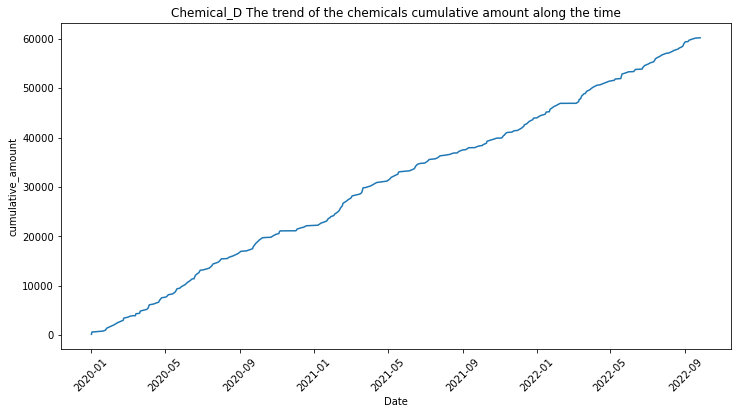

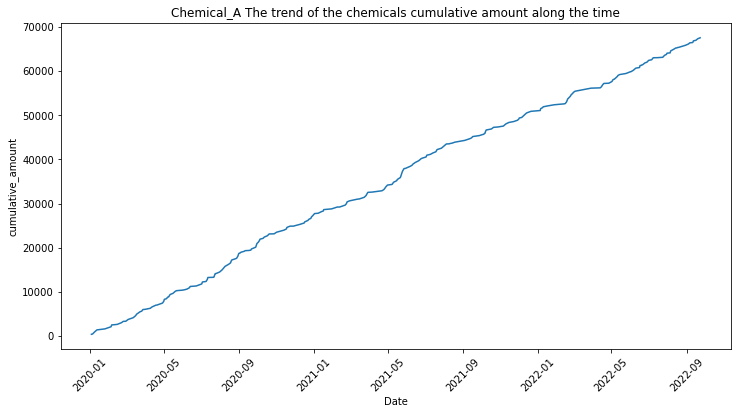

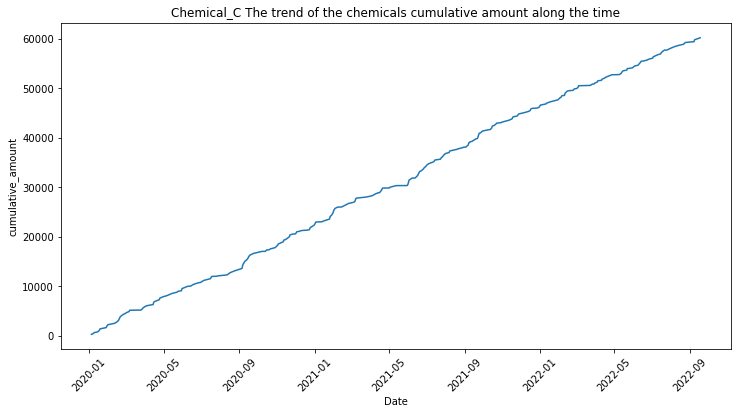

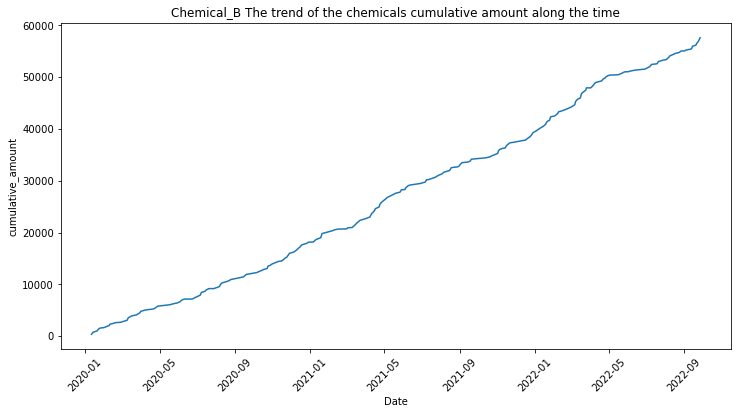

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for chemical in chemicals:
    df_chemical = df_agg[df_agg['chemical'] == chemical]
    df_chemical = df_chemical.set_index('date').sort_index()

    # cumulative_amount of the chemicals
    df_chemical['cumulative_amount'] = df_chemical['amount_taken'].cumsum()

    # visualisation
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_chemical, x=df_chemical.index, y='cumulative_amount')
    plt.title(f"{chemical} The trend of the chemicals cumulative amount along the time")
    plt.xlabel("Date")
    plt.ylabel("cumulative_amount")
    plt.xticks(rotation=45)
    plt.show()



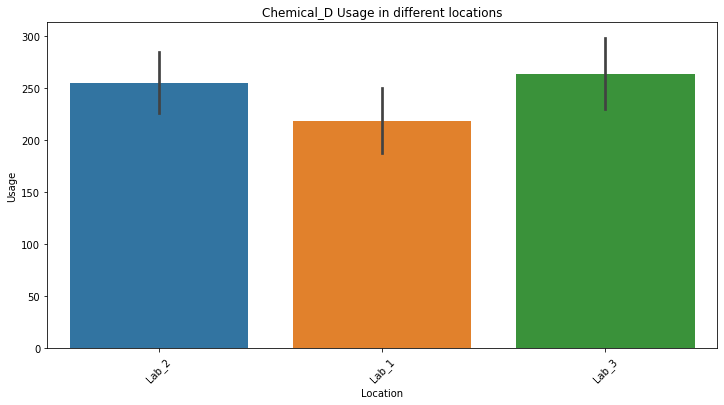

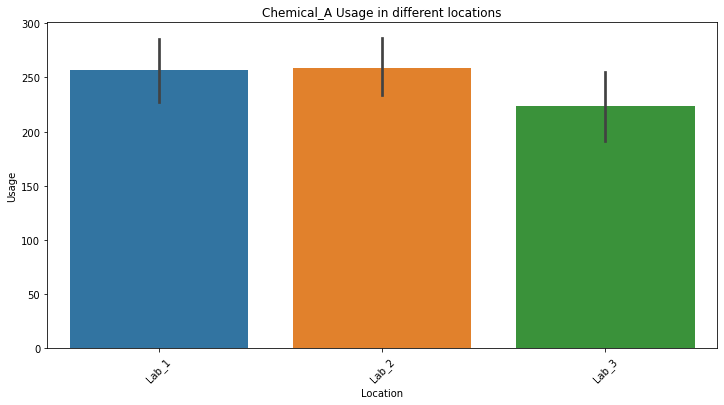

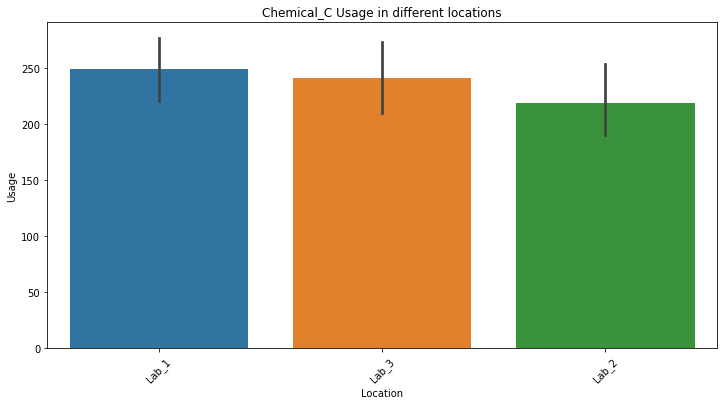

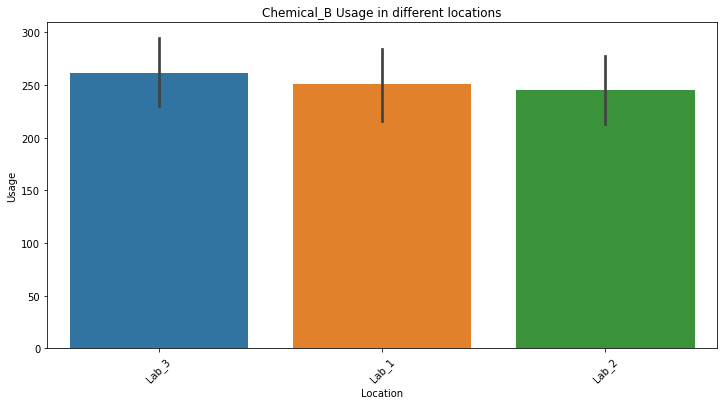

In [9]:
# different chemicals in different locations
for chemical in chemicals:
    df_chemical = df_agg[df_agg['chemical']==chemical]
    # visualisation
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_chemical, x='location', y='amount_taken')
    plt.title(f"{chemical} Usage in different locations")
    plt.xlabel("Location")
    plt.ylabel("Usage")
    plt.xticks(rotation=45)
    plt.show()

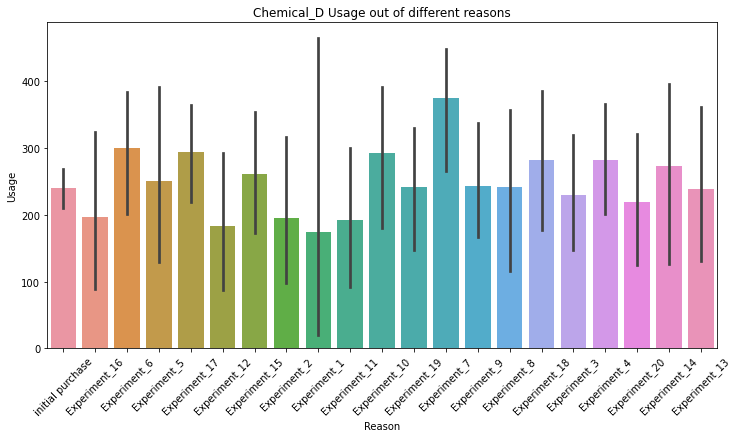

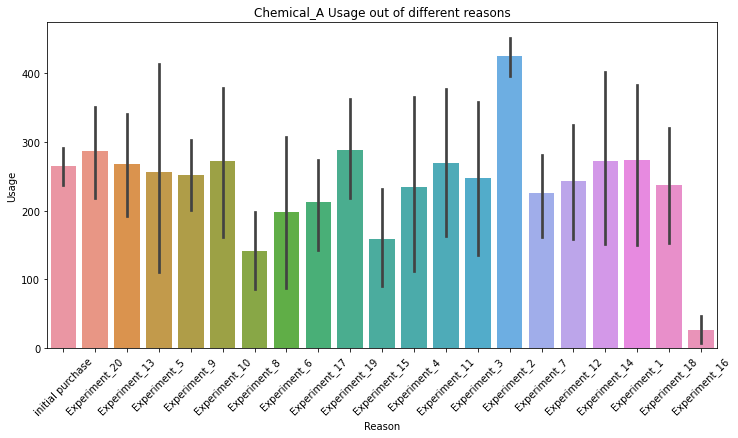

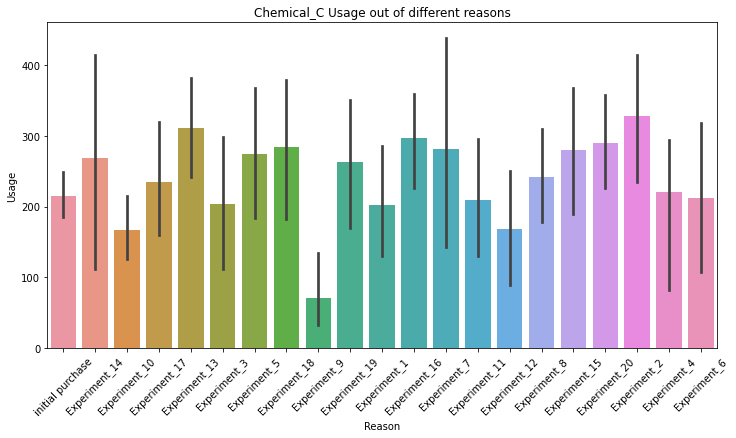

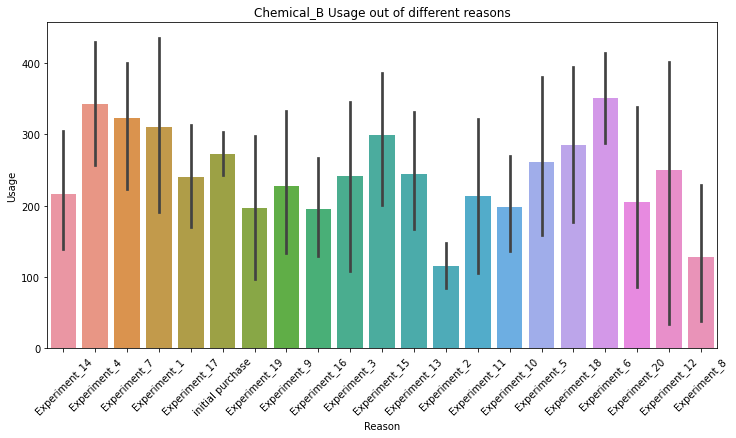

In [10]:
# Usage out of different reasons
for chemical in chemicals:
    df_chemical = df_agg[df_agg['chemical']==chemical]
    # visualisation
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_chemical, x='reason', y='amount_taken')
    plt.title(f"{chemical} Usage out of different reasons")
    plt.xlabel("Reason")
    plt.ylabel("Usage")
    plt.xticks(rotation=45)
    plt.show()
